#### Small Image Classification Using Convolutional Neural Network (CNN)
In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

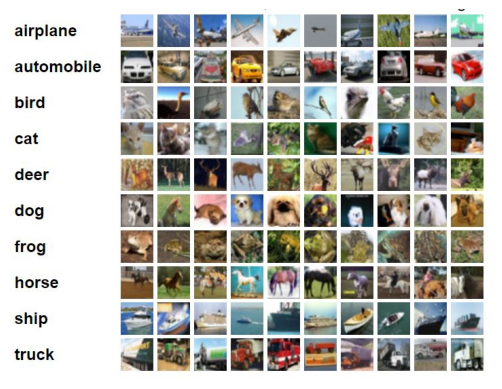

In [119]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to your image file
image_path = 'small_images.jpg'

# Load the image using matplotlib
image = mpimg.imread(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Remove axes
plt.show()


In [74]:
import pandas as pd
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

#### Load cifar10 datasets

In [75]:
data=datasets.cifar10.load_data()

In [76]:
(X_train,y_train),(X_test,y_test)=data

In [77]:
X_train.shape

(50000, 32, 32, 3)

In [78]:
y_train.shape

(50000, 1)

In [79]:
image_index=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

#### This method will plot the images

In [111]:
def image_plot(X_train,y_train,index):
    plt.figure(figsize=(10,6))
    plt.imshow(X_train[index])
    plt.xlabel(image_index[y_train[index]])

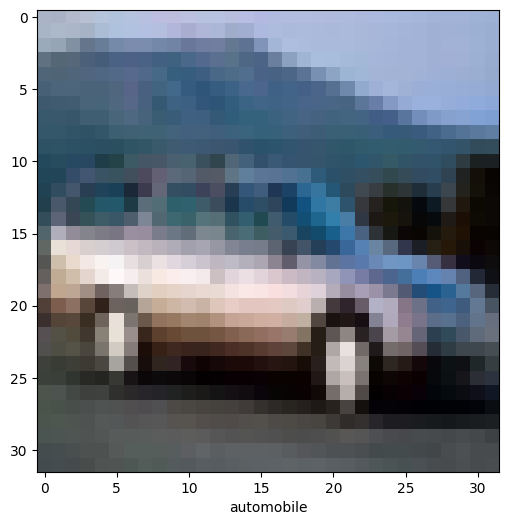

In [81]:
image_plot(X_train,y_train,4)

#### Normalize the training data

In [82]:
X_train=X_train/255

In [83]:
X_test=X_test/255

In [92]:
y_train=y_train.reshape(-1)

In [93]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

#### Build model using ANN

In [94]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 148s 93ms/step - loss: 1.8102 - accuracy: 0.3570
Epoch 2/5
1563/1563 [==============================] - 146s 94ms/step - loss: 1.6226 - accuracy: 0.4282
Epoch 3/5
1563/1563 [==============================] - 138s 88ms/step - loss: 1.5417 - accuracy: 0.4570
Epoch 4/5
1563/1563 [==============================] - 140s 90ms/step - loss: 1.4797 - accuracy: 0.4798
Epoch 5/5
1563/1563 [==============================] - 149s 95ms/step - loss: 1.4289 - accuracy: 0.4966


In [95]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 8s 23ms/step - loss: 1.7403 - accuracy: 0.3815


[1.740327000617981, 0.3815000057220459]

In [96]:
y_test=y_test.reshape(-1,)

In [97]:
from sklearn.metrics import classification_report
y_pred=ann.predict(X_test)
y_pred=[np.argmax(ele) for ele in y_pred]
print(classification_report(y_test,y_pred))

313/313 [==============================] - 7s 23ms/step
              precision    recall  f1-score   support

           0       0.44      0.62      0.52      1000
           1       0.26      0.92      0.41      1000
           2       0.44      0.26      0.33      1000
           3       0.46      0.13      0.20      1000
           4       0.34      0.47      0.39      1000
           5       0.42      0.28      0.34      1000
           6       0.76      0.18      0.29      1000
           7       0.42      0.60      0.50      1000
           8       0.69      0.18      0.29      1000
           9       0.66      0.17      0.27      1000

    accuracy                           0.38     10000
   macro avg       0.49      0.38      0.35     10000
weighted avg       0.49      0.38      0.35     10000



In [98]:
np.argmax(y_pred[0])

0

#### Build model using CNN

In [104]:
cnn=models.Sequential([
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 77s 48ms/step - loss: 1.4783 - accuracy: 0.4736
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1217 - accuracy: 0.6057
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0036 - accuracy: 0.6487
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9266 - accuracy: 0.6765
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8637 - accuracy: 0.6988
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8106 - accuracy: 0.7178
Epoch 7/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7700 - accuracy: 0.7319
Epoch 8/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7260 - accuracy: 0.7451
Epoch 9/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.6922 - accuracy: 0.7587
Epoch 10/10
1563/1563 [==============================] - 66s 42m

In [106]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9186 - accuracy: 0.6994


[0.9185881614685059, 0.699400007724762]

In [107]:
from sklearn.metrics import classification_report
y_pred=cnn.predict(X_test)
y_pred=[np.argmax(ele) for ele in y_pred]
print(classification_report(y_test,y_pred))

313/313 [==============================] - 9s 16ms/step
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1000
           1       0.84      0.81      0.82      1000
           2       0.57      0.61      0.59      1000
           3       0.50      0.54      0.52      1000
           4       0.69      0.59      0.63      1000
           5       0.61      0.59      0.60      1000
           6       0.82      0.72      0.77      1000
           7       0.73      0.76      0.74      1000
           8       0.74      0.86      0.80      1000
           9       0.83      0.74      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



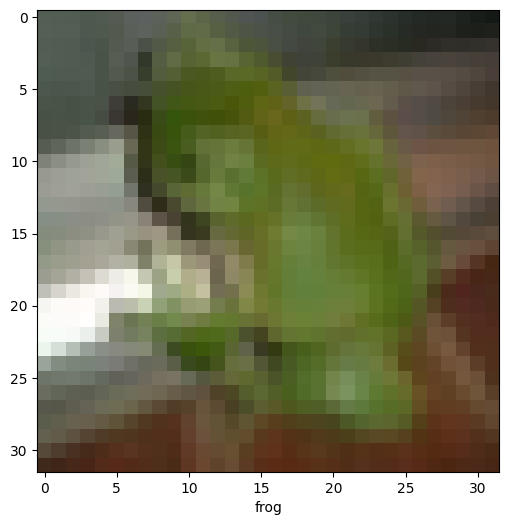

In [114]:
image_plot(X_test,y_test,7)

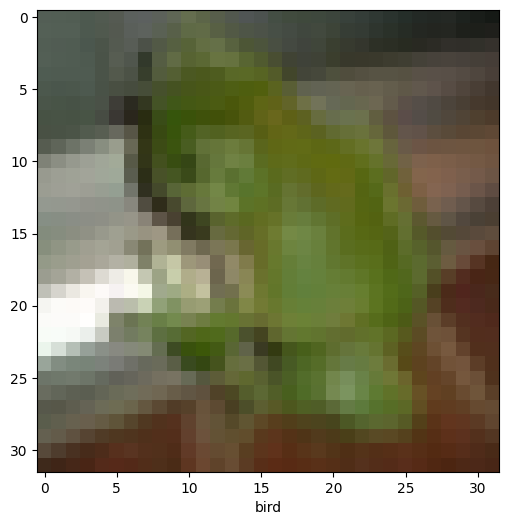

In [115]:
image_plot(X_test,y_pred,7)

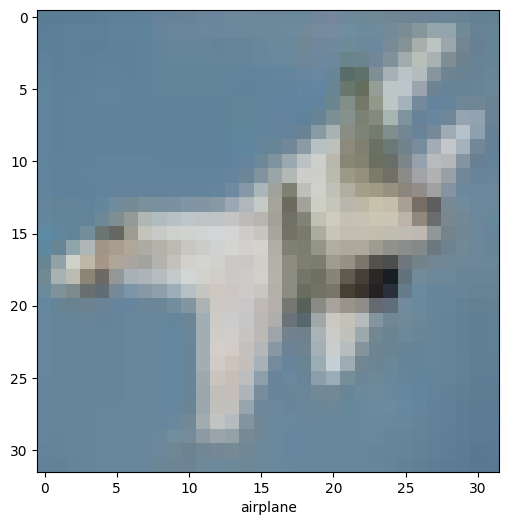

In [116]:
image_plot(X_test,y_test,10)

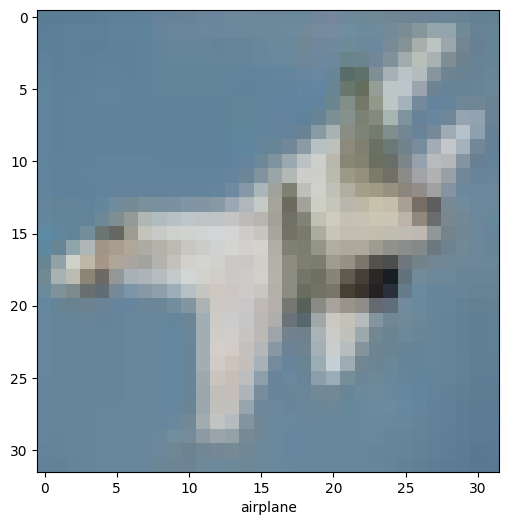

In [117]:
image_plot(X_test,y_pred,10)